# 1. Classification

In [6]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

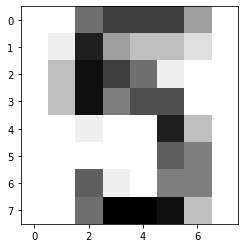

In [7]:
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify=y)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

print("Accuracy: {0}".format(knn.score(X_test,y_test)))

Accuracy: 0.9861111111111112


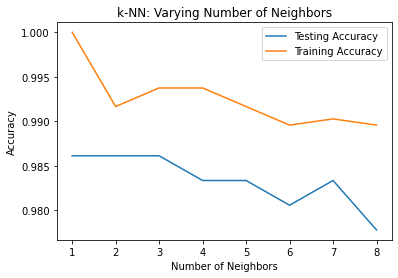

In [11]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [12]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [13]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.', train=True, download=True)

In [14]:
print("Number of training examples", mnist.train_data.shape)
print("Image information", mnist[0])

Number of training examples torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x184DF5EDC10>, 5)


C:\Users\HoanUIT\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


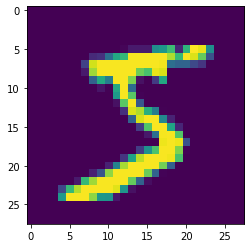

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0])

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fully = nn.Sequential(
            nn.Linear(28*28, 10)
        )
        
    def forward(self, x):
        x = x.view([-1,28*28])
        x = self.fully(x)
        x = F.log_softmax(x,dim=1)
        return x

In [17]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.',train=True, transform=transforms.Compose([transforms.ToTensor()])), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.',train=True, transform=transforms.Compose([transforms.ToTensor()])), batch_size=1, shuffle=True)

In [18]:
def train():
    learning_rate =1e-3
    num_epochs = 3
    
    net = Net()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            output = net(data)
            
            loss = F.nll_loss(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
            if batch_idx % 100 == 0:
                print('Epoch = %f. Batch = %s. Loss = %s' % (epoch, batch_idx, loss.item()))
        
    return net

In [19]:
net = train()

Epoch = 0.000000. Batch = 0. Loss = 2.336968421936035
Epoch = 0.000000. Batch = 100. Loss = 0.793280303478241
Epoch = 0.000000. Batch = 200. Loss = 0.6828640103340149
Epoch = 0.000000. Batch = 300. Loss = 0.5049362182617188
Epoch = 0.000000. Batch = 400. Loss = 0.5438689589500427
Epoch = 0.000000. Batch = 500. Loss = 0.3678492605686188
Epoch = 0.000000. Batch = 600. Loss = 0.3101623058319092
Epoch = 0.000000. Batch = 700. Loss = 0.410701721906662
Epoch = 0.000000. Batch = 800. Loss = 0.5442311763763428
Epoch = 0.000000. Batch = 900. Loss = 0.31593596935272217
Epoch = 1.000000. Batch = 0. Loss = 0.35177451372146606
Epoch = 1.000000. Batch = 100. Loss = 0.4409167766571045
Epoch = 1.000000. Batch = 200. Loss = 0.30342262983322144
Epoch = 1.000000. Batch = 300. Loss = 0.5178374648094177
Epoch = 1.000000. Batch = 400. Loss = 0.4321769177913666
Epoch = 1.000000. Batch = 500. Loss = 0.32274264097213745
Epoch = 1.000000. Batch = 600. Loss = 0.30401909351348877
Epoch = 1.000000. Batch = 700. Lo

In [20]:
net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
    total += len(target)
    output = net(data)
    pred = output.max(1, keepdim=True)[1]
    correct += target.eq(pred.view_as(target)).sum()
    
print("Correct out of %s" % total, correct.item())
print("Percentage accuracy", correct.item()*100/10000.)

Correct out of 60000 55309
Percentage accuracy 553.09


# II. Linear Regression

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('D:/Study/2021-2022 _ HK2/MKTG5883_DataMiningApp/Lab4/gapminder.csv')

In [23]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


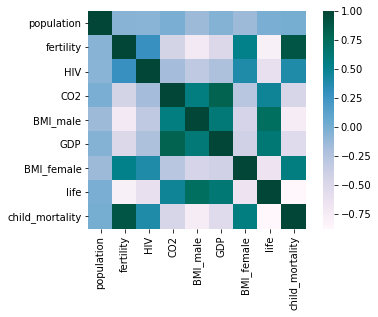

In [24]:
ax = sns.heatmap(df.corr(), square=True, cmap='PuBuGn')
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

0.6162438752151919


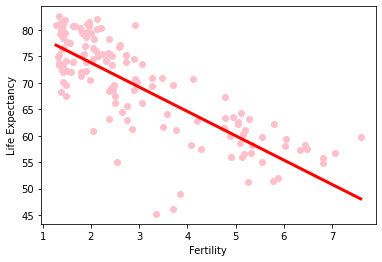

In [26]:
x_fertility = df['fertility'].values.reshape(-1,1)
y_life = df['life'].values.reshape(-1,1)
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x_fertility, y_life, test_size=0.3, random_state=42)

reg = LinearRegression()

reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

print(reg.score(x_fertility, y_life))

plt.scatter(x_fertility, y_life, color='pink')
plt.plot(prediction_space, y_predict, color='red', linewidth=3)
plt.ylabel('Life Expectancy')
plt.xlabel('Fertility')
plt.show()

In [27]:
features = pd.read_csv('D:/Study/2021-2022 _ HK2/MKTG5883_DataMiningApp/Lab4/gapminder.csv')
df = pd.read_csv('D:/Study/2021-2022 _ HK2/MKTG5883_DataMiningApp/Lab4/gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(features, y_life, test_size=0.3, random_state=42)

reg_all =LinearRegression()

reg_all.fit(x_train, y_train)

print(reg_all.score(features, y_life))

0.8914651485793137


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

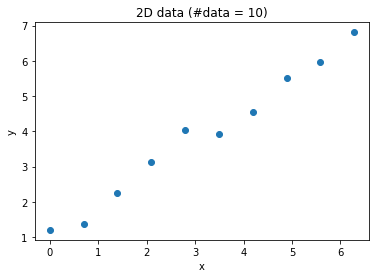

In [29]:
N = 10 
m = .9
c = 1
x = np.linspace(0,2*np.pi,N)
y = m*x + c + np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [30]:
import torch

In [31]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x=x
        self.y=y
        
    def __len__(self):
        return len(self.x)
        
    def __getitem__(self, idx):
        sample = {
            'feature': torch.tensor([1,self.x[idx]]),
            'label': torch.tensor([self.y[idx]])}
        return sample

In [32]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([1.2015], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([1.3558], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.2600], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([3.1151], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([4.0351], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([3.9347], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.5577], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([5.5045], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([5.9715], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([6.8112], dtype=torch.float64)


In [33]:
from torch.utils.data import DataLoader

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=0)

In [34]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print('samples: ')
    pp.pprint(samples)


batch# = 0
samples: 
{'feature': tensor([[1.0000, 5.5851],
        [1.0000, 0.6981],
        [1.0000, 3.4907],
        [1.0000, 4.1888]], dtype=torch.float64),
 'label': tensor([[5.9715],
        [1.3558],
        [3.9347],
        [4.5577]], dtype=torch.float64)}

batch# = 1
samples: 
{'feature': tensor([[1.0000, 0.0000],
        [1.0000, 1.3963],
        [1.0000, 2.0944],
        [1.0000, 2.7925]], dtype=torch.float64),
 'label': tensor([[1.2015],
        [2.2600],
        [3.1151],
        [4.0351]], dtype=torch.float64)}

batch# = 2
samples: 
{'feature': tensor([[1.0000, 6.2832],
        [1.0000, 4.8869]], dtype=torch.float64),
 'label': tensor([[6.8112],
        [5.5045]], dtype=torch.float64)}


In [35]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [36]:
input_dim = 2
output_dim = 1

model = MyModel(input_dim, output_dim)

In [37]:
cost = nn.MSELoss()

In [38]:
num_epochs = 10
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate)

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=0)

for epoch in range(num_epochs):
    print('Epoch = %s' % epoch)
    for batch_i, samples in enumerate(training_sample_generator):
        predictions = model(samples['feature'].float())
        error = cost(predictions, samples['label'].float())
        print('\tBatch = %s, Error = %s' % (batch_i, error.item()))
        
        optimiser.zero_grad()
        
        error.backward()
        
        optimiser.step()

Epoch = 0
	Batch = 0, Error = 54.07823181152344
	Batch = 1, Error = 7.600275993347168
	Batch = 2, Error = 12.175527572631836
Epoch = 1
	Batch = 0, Error = 3.535613775253296
	Batch = 1, Error = 2.1798439025878906
	Batch = 2, Error = 0.6992709636688232
Epoch = 2
	Batch = 0, Error = 0.7523390054702759
	Batch = 1, Error = 0.23145662248134613
	Batch = 2, Error = 0.05821770057082176
Epoch = 3
	Batch = 0, Error = 0.02556835673749447
	Batch = 1, Error = 0.2849911153316498
	Batch = 2, Error = 0.04393941909074783
Epoch = 4
	Batch = 0, Error = 0.19585582613945007
	Batch = 1, Error = 0.013937114737927914
	Batch = 2, Error = 0.08983944356441498
Epoch = 5
	Batch = 0, Error = 0.11142707616090775
	Batch = 1, Error = 0.09831186383962631
	Batch = 2, Error = 0.08665500581264496
Epoch = 6
	Batch = 0, Error = 0.05278928950428963
	Batch = 1, Error = 0.16919058561325073
	Batch = 2, Error = 0.02296537719666958
Epoch = 7
	Batch = 0, Error = 0.1552649289369583
	Batch = 1, Error = 0.080574631690979
	Batch = 2, E

In [39]:
predictions.dtype

torch.float32

In [40]:
predictions.to(dtype=float)

tensor([[4.8332],
        [0.7345]], dtype=torch.float64, grad_fn=<ToCopyBackward0>)

In [41]:
error.dtype

torch.float32

In [42]:
samples['label']

tensor([[4.5577],
        [1.2015]], dtype=torch.float64)

In [43]:
samples['feature'].to(dtype=float)

tensor([[1.0000, 4.1888],
        [1.0000, 0.0000]], dtype=torch.float64)

In [44]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


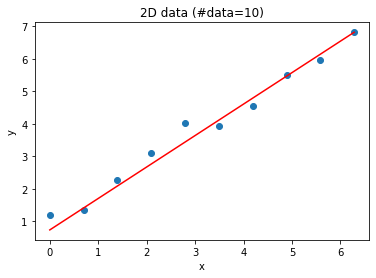

In [45]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data=%d)' % N)
plt.show()

# III. Recommendation Systems

In [64]:
def user_cf(M, metric='consine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=1)
    sim_users = sim_matrix(M, 'user', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[i] + np.nansum(sim_users[i] * (M[:,j] - avg_ratings)) / sum(sim_users[i])
    return pred

In [65]:
def item_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis=0)
    sim_items = sim_matrix(M, 'item', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[j] + np.nansum(sim_items[j] * (M[i,j] - avg_ratings)) / sum(sim_items[j])
    return pred

In [66]:
def evaluateRS(ratings, groundtruth, method='user_cf', metric='cosine'):
    if method == 'user_cf':
        prediction = user_cf(ratings, metric)
    else:
        prediction = item_cf(ratings, metric)
        MSE = mean_squared_error(prediction, groundtruth)
        RMSE = round(math.sqrt(MSE),3)
        print("RMSE using {0} approach ({2}) is: {1}".format(method, RMSE, metric))
        print(pd.DataFrame(prediction))
    return

In [67]:
M_result = np.asarray([[4,3,2,3], 
 [1,2,3,1],
 [1,2,1,2],
 [4,3,2,4]])
pd.DataFrame(M_result)

,0,1,2,3
0,4,3,2,3
1,1,2,3,1
2,1,2,1,2
3,4,3,2,4


In [68]:
M = np.asarray([[4,3,2,3], 
 [1,2,3,1],
 [np.nan,2,1,np.nan],
 [4,3,np.nan,np.nan],
# [1,1,1,1],
 ])
print(M.shape)
print(np.nanmean(M, axis=0))
pd.DataFrame(M)

(4, 4)
[3.  2.5 2.  2. ]


,0,1,2,3
0,4.0,3.0,2.0,3.0
1,1.0,2.0,3.0,1.0
2,NaN,2.0,1.0,NaN
3,4.0,3.0,NaN,NaN


In [69]:
import math 
def cosine_similarity(v1, v2, metric='cosine'):
    #metric: cosine or correlation
    if metric == 'correlation':
      v1 = v1 - np.nanmean (v1)
      v2 = v2 - np.nanmean (v2)
    "compute similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; 
        y = v2[i]
        if np.isnan(x) or np.isnan(y): continue
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)


def sim_matrix(M, dimension='user', metric='cosine') :
    N = M.shape [0] if dimension == 'user' else M.shape[1] 
    sim = np.zeros([N,N]) 
    for i in range (N): 
        for j in range(N): 
            if i == j:
                sim[i,j] = 0 #Cancel out the effect of self-similarity in the sums later
                continue 
            if dimension == 'user':
                v1, v2 = M[i,:], M[j,:] 
            else:
                v1, v2 = M[:,i], M[:,j]
            sim[i][j] = cosine_similarity(v1, v2, metric) 
            
    return sim

In [70]:
import scipy
from IPython.display import clear_output

def evaluate_rank(ratings, groundtruth, method='user_cf', metric='cosine'):
    if method == 'user_cf':
        prediction = user_cf(ratings, metric)
    else:
        prediction = item_cf(ratings, metric)
    n_users, n_items = M.shape
    avg_tau = 0
    for i in range(n_users):
        tau, p_value = scipy.stats.kendalltau(M_result[i,:], prediction[i,:])
        avg_tau += tau
    avg_tau = avg_tau / n_users
    #clear_output(wait=True)
    return avg_tau

In [72]:
evaluateRS(M, M_result, 'user_cf', 'cosine')
evaluateRS(M, M_result, 'user_cf', 'correlation')
evaluateRS(M, M_result, 'item_cf', 'cosine')
evaluateRS(M, M_result, 'item_cf', 'correlation')

results = []
for method in ['user_cf', 'item_cf']:
    for metric in ['cosine', 'correlation']:
        rank_acc = evaluate_rank(M, M_result, method, metric)
        results += ["Rank accuracy of {0} with {1} metric: {2}".format(method[1], metric, rank_acc)]
print("\n".join(results))

RMSE using item_cf approach (cosine) is: 0.707
     0    1    2    3
0  4.0  3.0  2.0  3.0
1  1.0  2.0  3.0  1.0
2  3.0  2.0  1.0  2.0
3  4.0  3.0  2.0  2.0
RMSE using item_cf approach (correlation) is: 0.707
     0    1    2    3
0  4.0  3.0  2.0  3.0
1  1.0  2.0  3.0  1.0
2  3.0  2.0  1.0  2.0
3  4.0  3.0  2.0  2.0
Rank accuracy of s with cosine metric: 0.6477056190747297
Rank accuracy of s with correlation metric: 0.56719350585564
Rank accuracy of t with cosine metric: 0.6
Rank accuracy of t with correlation metric: 0.6


# IV. Exercises

1. Classification (5p)

In [61]:
from sklearn import datasets
import pandas as pd

In [62]:
iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)

In [63]:
iris_df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [64]:
iris_df['class']= iris.target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True)
X=iris_df.iloc[:,[0,1,2,3]]

In [65]:
X

,sepal_len,sepal_wid,petal_len,petal_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [66]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [67]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
logreg.predict(X)

C:\Users\HoanUIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [68]:
y_pred = logreg.predict(X)
len(y_pred)

150

In [69]:
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


In [71]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


In [72]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [74]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [75]:
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [76]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [77]:
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [78]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.95, 0.95, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.95, 0.95]


Text(0, 0.5, 'Testing Accuracy')

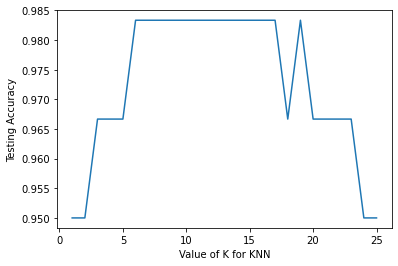

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [91]:
neighbors = np.arange(1,26)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)
  train_accuracy[i] = knn.score(X_train, y_train)

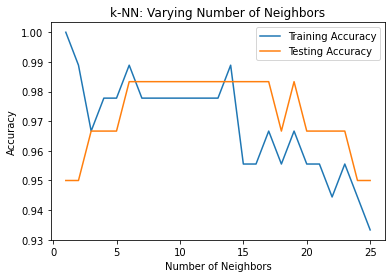

In [92]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [46]:
#pip install keras

In [47]:
#pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [48]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [52]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [53]:
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1)

In [56]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

In [61]:
model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

In [62]:
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\HoanUIT\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [63]:
print('Neural Network Model Summary: ')
print(model.summary())

Neural Network Model Summary: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 10)                50        
                                                                 
 fc2 (Dense)                 (None, 10)                110       
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


In [64]:
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)

Epoch 1/200
24/24 - 1s - loss: 1.2255 - accuracy: 0.6583 - 926ms/epoch - 39ms/step
Epoch 2/200
24/24 - 0s - loss: 1.0245 - accuracy: 0.6667 - 58ms/epoch - 2ms/step
Epoch 3/200
24/24 - 0s - loss: 0.9132 - accuracy: 0.6667 - 61ms/epoch - 3ms/step
Epoch 4/200
24/24 - 0s - loss: 0.8358 - accuracy: 0.7000 - 46ms/epoch - 2ms/step
Epoch 5/200
24/24 - 0s - loss: 0.7951 - accuracy: 0.6667 - 49ms/epoch - 2ms/step
Epoch 6/200
24/24 - 0s - loss: 0.7403 - accuracy: 0.6917 - 54ms/epoch - 2ms/step
Epoch 7/200
24/24 - 0s - loss: 0.6942 - accuracy: 0.7250 - 45ms/epoch - 2ms/step
Epoch 8/200
24/24 - 0s - loss: 0.6492 - accuracy: 0.7833 - 54ms/epoch - 2ms/step
Epoch 9/200
24/24 - 0s - loss: 0.6057 - accuracy: 0.7167 - 58ms/epoch - 2ms/step
Epoch 10/200
24/24 - 0s - loss: 0.5720 - accuracy: 0.8250 - 54ms/epoch - 2ms/step
Epoch 11/200
24/24 - 0s - loss: 0.5374 - accuracy: 0.8000 - 39ms/epoch - 2ms/step
Epoch 12/200
24/24 - 0s - loss: 0.5070 - accuracy: 0.8500 - 53ms/epoch - 2ms/step
Epoch 13/200
24/24 - 0s

Epoch 101/200
24/24 - 0s - loss: 0.0974 - accuracy: 0.9667 - 99ms/epoch - 4ms/step
Epoch 102/200
24/24 - 0s - loss: 0.1014 - accuracy: 0.9750 - 59ms/epoch - 2ms/step
Epoch 103/200
24/24 - 0s - loss: 0.0977 - accuracy: 0.9667 - 70ms/epoch - 3ms/step
Epoch 104/200
24/24 - 0s - loss: 0.0988 - accuracy: 0.9667 - 38ms/epoch - 2ms/step
Epoch 105/200
24/24 - 0s - loss: 0.0964 - accuracy: 0.9750 - 46ms/epoch - 2ms/step
Epoch 106/200
24/24 - 0s - loss: 0.0955 - accuracy: 0.9750 - 45ms/epoch - 2ms/step
Epoch 107/200
24/24 - 0s - loss: 0.0988 - accuracy: 0.9750 - 36ms/epoch - 1ms/step
Epoch 108/200
24/24 - 0s - loss: 0.0933 - accuracy: 0.9750 - 34ms/epoch - 1ms/step
Epoch 109/200
24/24 - 0s - loss: 0.0952 - accuracy: 0.9667 - 45ms/epoch - 2ms/step
Epoch 110/200
24/24 - 0s - loss: 0.0983 - accuracy: 0.9750 - 41ms/epoch - 2ms/step
Epoch 111/200
24/24 - 0s - loss: 0.0939 - accuracy: 0.9667 - 35ms/epoch - 1ms/step
Epoch 112/200
24/24 - 0s - loss: 0.0966 - accuracy: 0.9667 - 53ms/epoch - 2ms/step
Epoc

Epoch 200/200
24/24 - 0s - loss: 0.0733 - accuracy: 0.9667 - 39ms/epoch - 2ms/step


In [65]:
results = model.evaluate(test_x, test_y)

1/1 [==============================] - 0s 282ms/step - loss: 0.0436 - accuracy: 0.9667


In [66]:
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Final test set loss: 0.043604
Final test set accuracy: 0.966667


2. Recommendation Systems

In [35]:
import pandas as pd
import numpy as np

In [36]:
movies_df = pd.read_csv('D:/Study/2021-2022 _ HK2/MKTG5883_DataMiningApp/Lab4/movies.csv')
ratings_df = pd.read_csv('D:/Study/2021-2022 _ HK2/MKTG5883_DataMiningApp/Lab4/ratings.csv')
users_df = pd.read_csv('D:/Study/2021-2022 _ HK2/MKTG5883_DataMiningApp/Lab4/users.csv')

In [37]:
movies_df.dropna()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
94,95,Broken Arrow (1996),Action|Thriller
95,96,In the Bleak Midwinter (1995),Comedy
97,98,Shopping (1994),Action|Thriller
98,99,Heidi Fleiss: Hollywood Madam (1995),Documentary


In [38]:
ratings_df.dropna()

,user_id,movie_id,rating
0,1,1,3
1,1,3,5
2,1,4,4
3,1,5,3
4,1,6,3
...,...,...,...
7507,100,96,4
7508,100,97,4
7509,100,98,5
7510,100,99,5


In [39]:
users_df.dropna()

,user_id,gender,age,occupation,zipcode,age_desc,occ_desc
0,1,F,1,10,48067,Under 18,K-12 student
1,2,M,56,16,70072,56+,self-employed
2,3,M,25,15,55117,25-34,scientist
3,4,M,45,7,2460,45-49,executive/managerial
4,5,M,25,20,55455,25-34,writer
...,...,...,...,...,...,...,...
95,96,F,25,16,78028,25-34,self-employed
96,97,F,35,3,66210,35-44,clerical/admin
97,98,F,35,7,33547,35-44,executive/managerial
98,99,F,1,10,19390,Under 18,K-12 student


In [40]:
movies_df.isnull().sum()

movie_id     0
title        0
genres      15
dtype: int64

In [41]:
movies_df = movies_df.dropna(axis=0)

In [42]:
users_df.isnull().sum()

user_id       0
gender        0
age           0
occupation    0
zipcode       0
age_desc      0
occ_desc      0
dtype: int64

In [43]:
ratings_df.isnull().sum()

user_id     0
movie_id    0
rating      0
dtype: int64

In [44]:
def find_genres(x,listGen):
    arr = x.split("|")
    for i in arr:
        isIn= False
        for j in listGen:
            if(j ==i):
                isIn=True
        if(isIn==False):
            listGen.append(i)

In [45]:
def relaBetweenMovAndGen(x):
    temp = []
    for i in listGen:
        if i in x:
            temp.append(1)
        else:
            temp.append(0)
    Ij.append(temp)

a. Content-Based Recommendation Model

In [46]:
listGen = []
movies_df['genres'].apply(find_genres,listGen=listGen)
listGen

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Sci-Fi',
 'Documentary',
 'War',
 'Musical']

In [47]:
Ij=[]
movies_df['genres'].apply(relaBetweenMovAndGen)
Ij[:4]

[[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]

In [48]:
def finduserGen(movies_id,users_genres):
    movies_arr = movies_id.split('|')
    movies_arr = [eval(x) for x in movies_arr]
    user_genres=[]
    for i in movies_arr:
        a = movies_df.loc[movies_df['movie_id'] == i]
        if(a.empty):
            continue
        else:
            genres = a.values[0,2].split('|')
            for k in genres:
                isIn= False
                for l in user_genres:
                    if(k ==l):
                        isIn=True
                if(isIn==False):
                    user_genres.append(k)
    users_genres.append(user_genres)

In [49]:
ratings_df['movie_id']=ratings_df['movie_id'].astype(str)
new_ratings = ratings_df.sort_values(['user_id'],ascending=False).groupby(['user_id'], as_index=False).agg({'movie_id': '|'.join})
new_ratings

,user_id,movie_id
0,1,42|31|32|34|35|36|37|39|45|43|44|28|46|47|48|4...
1,2,37|28|29|30|31|35|36|45|40|41|25|49|50|51|52|5...
2,3,30|39|31|32|33|34|35|36|38|46|40|41|42|43|44|4...
3,4,46|32|34|35|37|39|40|43|44|49|47|48|29|50|1|52...
4,5,40|28|29|33|34|35|36|39|44|41|43|45|46|47|48|2...
...,...,...
95,96,26|28|29|30|31|34|36|41|38|39|40|43|44|46|24|4...
96,97,41|28|32|33|34|35|36|39|40|44|42|43|26|45|46|4...
97,98,36|27|28|30|31|33|34|35|40|37|39|23|41|43|44|4...
98,99,43|33|35|36|37|38|39|41|52|44|45|48|49|50|51|3...


In [50]:
def relaBetweenUsrAndGen(users_genres,listGen):
    usrRelaGens=[]
    for i in users_genres:
        temp=[]
        a = ' '.join(map(str, i))
        for j in listGen:
            if(j in a):
                temp.append(1)
            else:
                temp.append(0)
        usrRelaGens.append(temp)
    return usrRelaGens

In [51]:
users_genres=[]
new_ratings['movie_id'].apply(finduserGen,users_genres=users_genres)
Uj=relaBetweenUsrAndGen(users_genres,listGen)
Uj

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [52]:
from sklearn.metrics.pairwise import cosine_similarity

In [53]:
cosine_sim = cosine_similarity(Ij,Uj)
cosine_sim

array([[0.46291005, 0.46291005, 0.4472136 , ..., 0.46291005, 0.4472136 ,
        0.4472136 ],
       [0.46291005, 0.46291005, 0.4472136 , ..., 0.46291005, 0.4472136 ,
        0.4472136 ],
       [0.37796447, 0.37796447, 0.36514837, ..., 0.37796447, 0.36514837,
        0.36514837],
       ...,
       [0.37796447, 0.37796447, 0.36514837, ..., 0.37796447, 0.36514837,
        0.36514837],
       [0.26726124, 0.26726124, 0.25819889, ..., 0.26726124, 0.25819889,
        0.25819889],
       [0.37796447, 0.37796447, 0.36514837, ..., 0.37796447, 0.36514837,
        0.36514837]])

b. Collaborative Filtering Recommendation Model by Users

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
movies_train,movies_test = train_test_split(movies_df,test_size = 0.5)
ratings_train, ratings_test = train_test_split(ratings_df,test_size=0.5)
users_train,users_test = train_test_split(users_df,test_size=0.5)

ratings_train_data_matrix = ratings_train.pivot_table(index=['user_id'], columns=['movie_id'],
values=['rating']).astype('float64')
ratings_test_data_matrix = ratings_test.pivot_table(index=['user_id'], columns=['movie_id'],
values=['rating']).astype('float64')

In [56]:
ratings_train_data_matrix

rating                                               ...            \
movie_id      1   10  100   11   12   13   14   15   16   17  ...   90   91   
user_id                                                       ...             
1           NaN  NaN  NaN  NaN  4.0  1.0  NaN  NaN  4.0  NaN  ...  4.0  NaN   
2           3.0  NaN  3.0  4.0  NaN  NaN  NaN  NaN  4.0  NaN  ...  NaN  NaN   
3           NaN  NaN  4.0  NaN  NaN  NaN  NaN  NaN  4.0  NaN  ...  NaN  NaN   
4           1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  4.0  ...  NaN  NaN   
5           2.0  NaN  NaN  4.0  NaN  3.0  3.0  NaN  4.0  NaN  ...  NaN  4.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
96          NaN  NaN  1.0  4.0  5.0  NaN  NaN  4.0  3.0  NaN  ...  3.0  NaN   
97          NaN  3.0  NaN  4.0  NaN  NaN  NaN  5.0  3.0  NaN  ...  3.0  NaN   
98          NaN  4.0  NaN  NaN  NaN  5.0  2.0  3.0  NaN  NaN  ...  5.0  NaN   
99          4.0  NaN  3.0  NaN  3.0  NaN  5.0  NaN  4.0  NaN  ...  NaN  NaN   
100         NaN  NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  4.0  ...  4.0  NaN   

                                                 
movie_id   92   93   94   95   96  97   98   99  
user_id                                          
1         NaN  NaN  4.0  NaN  NaN NaN  5.0  NaN  
2         4.0  NaN  5.0  NaN  NaN NaN  NaN  4.0  
3         NaN  4.0  NaN  NaN  4.0 NaN  NaN  4.0  
4         4.0  5.0  4.0  NaN  4.0 NaN  NaN  NaN  
5         3.0  NaN  4.0  NaN  NaN NaN  5.0  NaN  
...       ...  ...  ...  ...  ...  ..  ...  ...  
96        NaN  NaN  NaN  NaN  3.0 NaN  NaN  NaN  
97        NaN  NaN  4.0  NaN  NaN NaN  NaN  4.0  
98        4.0  NaN  NaN  NaN  4.0 NaN  4.0  NaN  
99        NaN  NaN  4.0  4.0  NaN NaN  NaN  NaN  
100       NaN  3.0  NaN  NaN  NaN NaN  NaN  5.0  

[100 rows x 100 columns]

In [57]:
ratings_train_data_matrix_norm = ratings_train_data_matrix.subtract(ratings_train_data_matrix.mean(axis=1),axis='rows')
ratings_train_data_matrix_norm

rating                                                    \
movie_id         1        10       100        11        12        13   
user_id                                                                
1              NaN       NaN       NaN       NaN  0.200000 -2.800000   
2        -0.604651       NaN -0.604651  0.395349       NaN       NaN   
3              NaN       NaN  0.395349       NaN       NaN       NaN   
4        -2.588235       NaN       NaN       NaN       NaN       NaN   
5        -1.658537       NaN       NaN  0.341463       NaN -0.658537   
...            ...       ...       ...       ...       ...       ...   
96             NaN       NaN -2.371429  0.628571  1.628571       NaN   
97             NaN -0.568182       NaN  0.431818       NaN       NaN   
98             NaN  0.523810       NaN       NaN       NaN  1.523810   
99        0.500000       NaN -0.500000       NaN -0.500000       NaN   
100            NaN       NaN  1.281250       NaN       NaN       NaN   

                                                  ...                      \
movie_id        14        15        16        17  ...        90        91   
user_id                                           ...                       
1              NaN       NaN  0.200000       NaN  ...  0.200000       NaN   
2              NaN       NaN  0.395349       NaN  ...       NaN       NaN   
3              NaN       NaN  0.395349       NaN  ...       NaN       NaN   
4              NaN       NaN       NaN  0.411765  ...       NaN       NaN   
5        -0.658537       NaN  0.341463       NaN  ...       NaN  0.341463   
...            ...       ...       ...       ...  ...       ...       ...   
96             NaN  0.628571 -0.371429       NaN  ... -0.371429       NaN   
97             NaN  1.431818 -0.568182       NaN  ... -0.568182       NaN   
98       -1.476190 -0.476190       NaN       NaN  ...  1.523810       NaN   
99        1.500000       NaN  0.500000       NaN  ...       NaN       NaN   
100            NaN       NaN       NaN  0.281250  ...  0.281250       NaN   

                                                                               
movie_id        92        93        94   95        96  97        98        99  
user_id                                                                        
1              NaN       NaN  0.200000  NaN       NaN NaN  1.200000       NaN  
2         0.395349       NaN  1.395349  NaN       NaN NaN       NaN  0.395349  
3              NaN  0.395349       NaN  NaN  0.395349 NaN       NaN  0.395349  
4         0.411765  1.411765  0.411765  NaN  0.411765 NaN       NaN       NaN  
5        -0.658537       NaN  0.341463  NaN       NaN NaN  1.341463       NaN  
...            ...       ...       ...  ...       ...  ..       ...       ...  
96             NaN       NaN       NaN  NaN -0.371429 NaN       NaN       NaN  
97             NaN       NaN  0.431818  NaN       NaN NaN       NaN  0.431818  
98        0.523810       NaN       NaN  NaN  0.523810 NaN  0.523810       NaN  
99             NaN       NaN  0.500000  0.5       NaN NaN       NaN       NaN  
100            NaN -0.718750       NaN  NaN       NaN NaN       NaN  1.281250  

[100 rows x 100 columns]

In [58]:
user_similarity = ratings_train_data_matrix.T.corr()
user_similarity

user_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-1.416767e-01,-0.216032,-1.483477e-02,0.073620,-0.291859,0.151063,1.915612e-01,0.460639,0.559558,...,2.155124e-17,-0.283085,0.371939,-0.445778,-7.319336e-17,-8.036996e-01,-0.003050,0.166208,0.063246,0.189389
2,-0.141677,1.000000e+00,0.079222,-1.454551e-16,0.097899,-0.029915,0.117647,8.688052e-02,0.378620,0.275570,...,-1.055501e-02,0.634094,-0.501091,0.386785,1.385490e-01,4.640994e-17,-0.149060,0.239227,-0.221901,-0.088688
3,-0.216032,7.922216e-02,1.000000,4.165402e-02,-0.297185,0.300123,-0.034769,5.035082e-01,-0.323509,0.109958,...,-1.980720e-01,-0.216807,-0.116845,0.025078,-1.901512e-01,-1.153420e-01,-0.117086,-0.065665,0.095618,0.260199
4,-0.014835,-1.454551e-16,0.041654,1.000000e+00,0.044950,-0.340207,0.212962,1.534368e-16,0.109955,0.252873,...,-1.513415e-02,0.114520,-0.394807,0.097222,2.047865e-02,-5.270036e-01,0.069393,0.016169,-0.355829,0.251339
5,0.073620,9.789913e-02,-0.297185,4.494968e-02,1.000000,-0.185107,-0.155215,-2.100634e-01,0.182289,-0.056066,...,4.005701e-02,0.263621,-0.081403,-0.171088,-3.065123e-01,2.308218e-01,0.386244,0.194502,0.045145,0.020268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-0.803700,4.640994e-17,-0.115342,-5.270036e-01,0.230822,-0.123853,0.149896,-6.050634e-01,-0.442262,-0.414646,...,1.853934e-01,-0.004029,0.397003,0.369772,2.264554e-01,1.000000e+00,0.170054,-0.326055,0.113151,-0.674349
97,-0.003050,-1.490602e-01,-0.117086,6.939315e-02,0.386244,-0.344350,0.200820,-1.696063e-16,0.685172,0.456696,...,-1.338646e-01,-0.181568,0.335928,-0.299156,3.732884e-01,1.700543e-01,1.000000,-0.158527,0.090579,0.299403
98,0.166208,2.392267e-01,-0.065665,1.616904e-02,0.194502,0.334105,-0.221718,4.102670e-03,0.351464,0.035706,...,1.512475e-01,0.219199,-0.105556,0.378724,1.646013e-01,-3.260547e-01,-0.158527,1.000000,-0.068465,-0.155764


c. Collaborative Filtering Recommendation Model by Items.

In [59]:
ratings_train_data_matrix = ratings_train.pivot_table(index=['movie_id'], columns=['user_id'],
values=['rating']).astype('float64')
ratings_test_data_matrix = ratings_test.pivot_table(index=['movie_id'], columns=['user_id'],
values=['rating']).astype('float64')

In [60]:
user_similarity = ratings_train_data_matrix.T.corr()
user_similarity

movie_id,1,10,100,11,12,13,14,15,16,17,...,90,91,92,93,94,95,96,97,98,99
movie_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.286046,-0.259914,-0.561057,-0.235267,0.113446,0.304997,-0.165295,-0.005209,0.078278,...,0.434515,0.092635,0.027995,0.206339,0.086106,-0.500860,-0.219623,-0.254558,-0.196018,-0.573659
10,-0.286046,1.000000,-0.435893,-0.090764,-0.044194,-0.087826,0.058549,-0.403414,-0.198310,0.297806,...,0.005274,-0.139360,0.198634,-0.332686,0.016915,0.067420,0.078563,0.206014,-0.130779,-0.387609
100,-0.259914,-0.435893,1.000000,0.237826,-0.001561,0.178542,0.287119,0.277413,0.037013,-0.153209,...,-0.036001,-0.284389,-0.037924,0.537327,0.300480,-0.056383,-0.238904,-0.163817,-0.291282,0.527986
11,-0.561057,-0.090764,0.237826,1.000000,0.165349,-0.134771,0.147819,0.017654,0.060900,0.430007,...,-0.544245,-0.004390,0.100986,-0.244554,0.261911,-0.246891,-0.055351,-0.061357,-0.060193,0.261628
12,-0.235267,-0.044194,-0.001561,0.165349,1.000000,0.630936,0.543417,0.260829,-0.021427,-0.055902,...,-0.211456,0.390334,-0.051554,-0.059284,0.245403,0.024654,0.472647,0.038984,0.330049,-0.098848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.500860,0.067420,-0.056383,-0.246891,0.024654,-0.009858,-0.104010,-0.070041,-0.104611,-0.288675,...,-0.204078,-0.047400,-0.475678,-0.301425,-0.078567,1.000000,-0.112390,0.131945,0.187500,0.458831
96,-0.219623,0.078563,-0.238904,-0.055351,0.472647,0.226913,0.176434,-0.301997,0.414036,0.386986,...,-0.054513,0.624801,0.195237,0.188248,0.286009,-0.112390,1.000000,0.080107,-0.275010,-0.216777
97,-0.254558,0.206014,-0.163817,-0.061357,0.038984,0.031250,-0.306037,-0.327491,-0.159040,0.227185,...,-0.206203,0.466280,0.057040,0.145484,-0.555198,0.131945,0.080107,1.000000,-0.102710,0.321634
